In [19]:
import subprocess, msprime, pyslim
import matplotlib.pyplot as plt
import numpy as np

In [26]:
# run simulation
#subprocess.check_output(["slim", "-m", "-s", "0", "./selection-against-introgression.slim"])
# Load the .trees file
ts = pyslim.load("./inter-chrom-variation-only.trees").simplify()

In [47]:
print("Tree sequence has {} trees".format(ts.num_trees))
print("Tree sequence has {} nodes".format(ts.num_nodes))
print("Tree sequence spans {} positions".format(ts.sequence_length))
print("Tree sequence has {} samples".format(ts.num_samples))
print("Tree sequence has {} samples".format(ts.num_individuals))

Tree sequence has 752 trees
Tree sequence has 320962 nodes
Tree sequence spans 1001.0 positions
Tree sequence has 20000 samples
Tree sequence has 10691 samples


In [32]:
for tree in reversed(ts.trees()):
    print(
        "Tree {} covers [{:.2f}, {:.2f})".format(
            tree.index, *tree.interval)
    )

Tree 751 covers [1000.00, 1001.00)
Tree 750 covers [999.00, 1000.00)
Tree 749 covers [998.00, 999.00)
Tree 748 covers [997.00, 998.00)
Tree 747 covers [996.00, 997.00)
Tree 746 covers [995.00, 996.00)
Tree 745 covers [994.00, 995.00)
Tree 744 covers [993.00, 994.00)
Tree 743 covers [992.00, 993.00)
Tree 742 covers [991.00, 992.00)
Tree 741 covers [990.00, 991.00)
Tree 740 covers [989.00, 990.00)
Tree 739 covers [988.00, 989.00)
Tree 738 covers [987.00, 988.00)
Tree 737 covers [986.00, 987.00)
Tree 736 covers [985.00, 986.00)
Tree 735 covers [984.00, 985.00)
Tree 734 covers [983.00, 984.00)
Tree 733 covers [982.00, 983.00)
Tree 732 covers [981.00, 982.00)
Tree 731 covers [980.00, 981.00)
Tree 730 covers [979.00, 980.00)
Tree 729 covers [978.00, 979.00)
Tree 728 covers [977.00, 978.00)
Tree 727 covers [976.00, 977.00)
Tree 726 covers [975.00, 976.00)
Tree 725 covers [974.00, 975.00)
Tree 724 covers [973.00, 974.00)
Tree 723 covers [972.00, 973.00)
Tree 722 covers [971.00, 972.00)
Tree 72

In [75]:
tree1 = ts.at(99)
print(
    "Tree {} covers [{:.2f}, {:.2f}): id={:x}".format(
        tree.index, *tree.interval, id(tree)
    )
)

Tree -1 covers [0.00, 0.00): id=7fb5e5128588


In [76]:
tree1.num_roots
for u in tree1.roots:
    print(tree1.population(u))

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


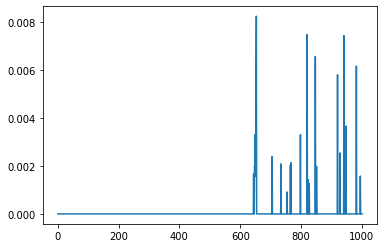

In [63]:
breaks = np.zeros(ts.num_trees + 1)
ancestry = np.zeros(ts.num_trees + 1)
for tree in ts.trees(sample_counts=True):
    subpop_sum, subpop_weights = 0, 0
    for root in tree.roots:
        leaves_count = tree.num_samples(root) - 1 # the root is a sample 
        subpop_sum += tree.population(root) * leaves_count
        subpop_weights += leaves_count
    breaks[tree.index] = tree.interval[0]
    ancestry[tree.index] = subpop_sum / subpop_weights
breaks[-1] = ts.sequence_length
ancestry[-1] = ancestry[-2]
     # Make a simple plot
plt.plot(breaks, ancestry)
plt.show()
